In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
# Step 1: Extract the Activities log section
with open("./89779400-d017-4487-99bd-02d7e72091e1_final.log", "r") as f:
    lines = f.readlines()
#     print(lines)

# Step 2: Isolate the "Activities log" block
in_activities = False
activities_lines = []

for line in lines:
    if line.strip() == "Activities log:":
        in_activities = True
        continue
    if in_activities:
        if line.strip() == "" or line.endswith("log:\n"):  # new section or empty
            break
        activities_lines.append(line.strip())

# Step 3: Save the extracted log to a temporary file (optional, for clarity)
with open("activities_temp.log", "w") as f:
    for line in activities_lines:
        f.write(line + "\n")

# Step 4: Convert to CSV using pandas
df = pd.read_csv("activities_temp.log", sep=";", engine="python")
df.to_csv("activities_log.csv", index=False)

In [3]:
df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,3,0,SQUID_INK,1820.0,1.0,1819.0,27.0,NaN,NaN,1822,27,NaN,NaN,NaN,NaN,1821.0,0.000000
1,3,0,VOLCANIC_ROCK_VOUCHER_10000,182.0,16.0,NaN,NaN,NaN,NaN,183,16,NaN,NaN,NaN,NaN,182.5,0.000000
2,3,0,KELP,2040.0,28.0,NaN,NaN,NaN,NaN,2043,27,NaN,NaN,NaN,NaN,2041.5,0.000000
3,3,0,RAINFOREST_RESIN,9992.0,33.0,NaN,NaN,NaN,NaN,10008,33,NaN,NaN,NaN,NaN,10000.0,0.000000
4,3,0,VOLCANIC_ROCK_VOUCHER_10250,36.0,16.0,NaN,NaN,NaN,NaN,37,16,NaN,NaN,NaN,NaN,36.5,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139995,3,999900,JAMS,6446.0,96.0,6445.0,175.0,NaN,NaN,6447,261,NaN,NaN,NaN,NaN,6446.5,0.000000
139996,3,999900,CROISSANTS,4295.0,148.0,NaN,NaN,NaN,NaN,4296,62,4297.0,86.0,NaN,NaN,4295.5,0.000000
139997,3,999900,VOLCANIC_ROCK_VOUCHER_9500,421.0,20.0,NaN,NaN,NaN,NaN,422,20,NaN,NaN,NaN,NaN,421.5,-19540.484375
139998,3,999900,VOLCANIC_ROCK,9920.0,137.0,9919.0,69.0,NaN,NaN,9921,131,9922.0,69.0,NaN,NaN,9920.5,-71793.750000


In [4]:
pnl = df.groupby(['timestamp', 'product'])['profit_and_loss'].sum().unstack(fill_value=0)
pnl

product,CROISSANTS,DJEMBES,JAMS,KELP,PICNIC_BASKET1,PICNIC_BASKET2,RAINFOREST_RESIN,SQUID_INK,VOLCANIC_ROCK,VOLCANIC_ROCK_VOUCHER_10000,VOLCANIC_ROCK_VOUCHER_10250,VOLCANIC_ROCK_VOUCHER_10500,VOLCANIC_ROCK_VOUCHER_9500,VOLCANIC_ROCK_VOUCHER_9750
timestamp,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.000000,0.00,0.000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000
100,0.0,0.0,0.0,0.000000,0.00,0.000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000
200,0.0,0.0,0.0,5.064453,0.00,0.000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000
300,0.0,0.0,0.0,3.476562,0.00,0.000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000
400,0.0,0.0,0.0,4.212891,0.00,0.000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999500,0.0,0.0,0.0,4680.250000,19647.50,-2967.750,25651.0,0.0,-73146.25,53102.082031,-17796.720703,-5084.0,-19354.130859,-4180.375000
999600,0.0,0.0,0.0,4677.585938,19579.00,-3117.000,25651.0,0.0,-72797.75,52570.300781,-17803.880859,-5084.0,-19385.019531,-4157.416016
999700,0.0,0.0,0.0,4678.031250,19384.00,-3047.125,25651.0,0.0,-72574.25,53149.164062,-17806.779297,-5084.0,-19426.542969,-4170.120117


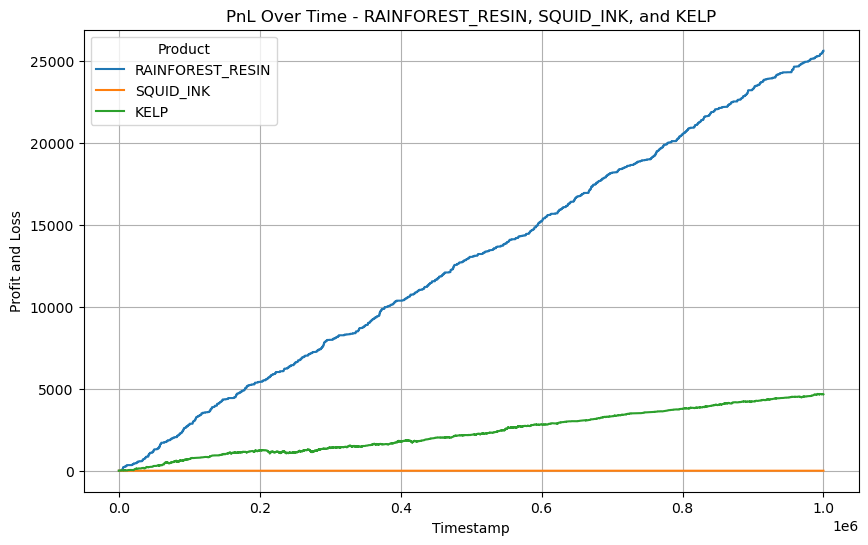

In [5]:
products = ['RAINFOREST_RESIN', 'SQUID_INK', 'KELP']
pnl[products].plot(figsize=(10, 6))  # you can tweak figsize as you like

plt.title("PnL Over Time - RAINFOREST_RESIN, SQUID_INK, and KELP")
plt.xlabel("Timestamp")
plt.ylabel("Profit and Loss")
plt.legend(title="Product")
plt.grid(True)
plt.show()

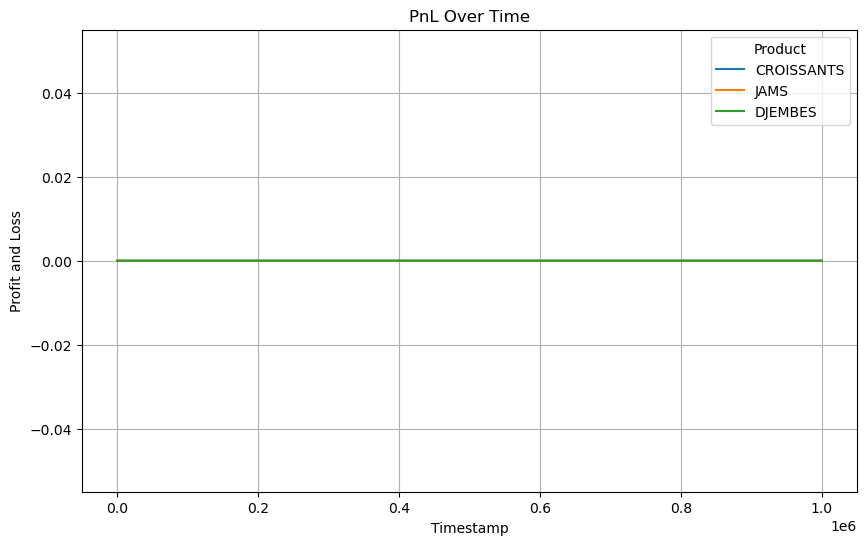

In [6]:
products = ['CROISSANTS', 'JAMS', 'DJEMBES']
pnl[products].plot(figsize=(10, 6))  # you can tweak figsize as you like

plt.title("PnL Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Profit and Loss")
plt.legend(title="Product")
plt.grid(True)
plt.show()

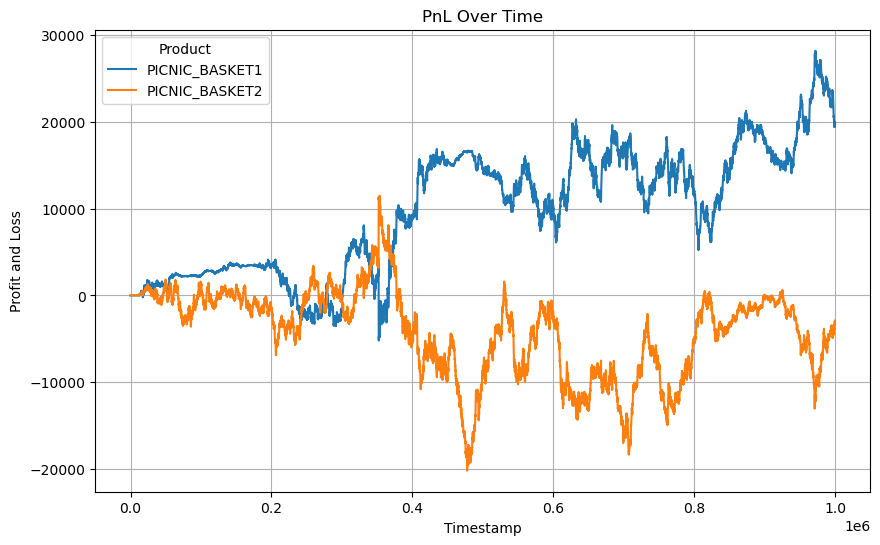

In [7]:
products = ['PICNIC_BASKET1','PICNIC_BASKET2']
pnl[products].plot(figsize=(10, 6))  # you can tweak figsize as you like

plt.title("PnL Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Profit and Loss")
plt.legend(title="Product")
plt.grid(True)
plt.show()

In [8]:
products = ['VOLCANIC_ROCK','VOLCANIC_ROCK_VOUCHER_9500','VOLCANIC_ROCK_VOUCHER_9750', 'VOLCANIC_ROCK_VOUCHER_10000', 'VOLCANIC_ROCK_VOUCHER_10250', 'VOLCANIC_ROCK_VOUCHER_10500']

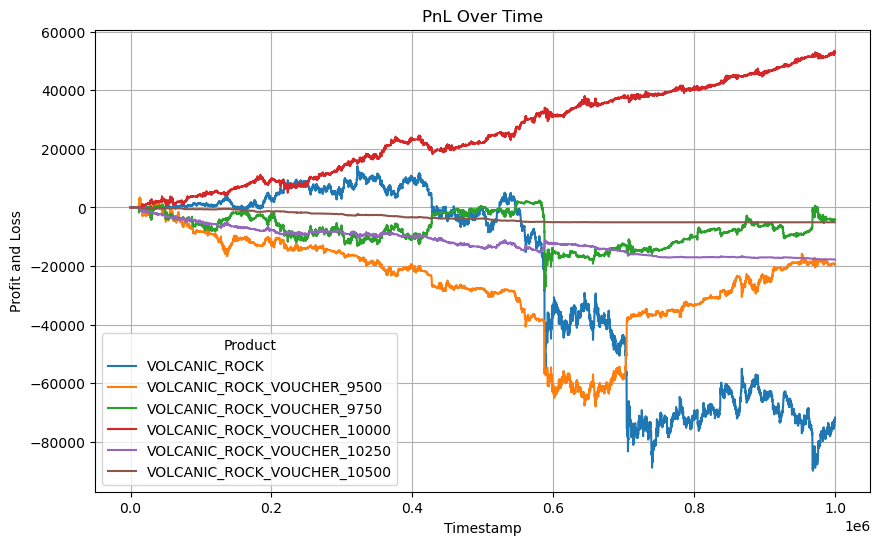

In [9]:
pnl[products].plot(figsize=(10, 6))  # you can tweak figsize as you like

plt.title("PnL Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Profit and Loss")
plt.legend(title="Product")
plt.grid(True)
plt.show()

In [10]:
# Group by timestamp and product, then compute the mean of mid_price for each group
mid_price = df.groupby(['timestamp', 'product'])['mid_price'].mean().unstack(fill_value=0)

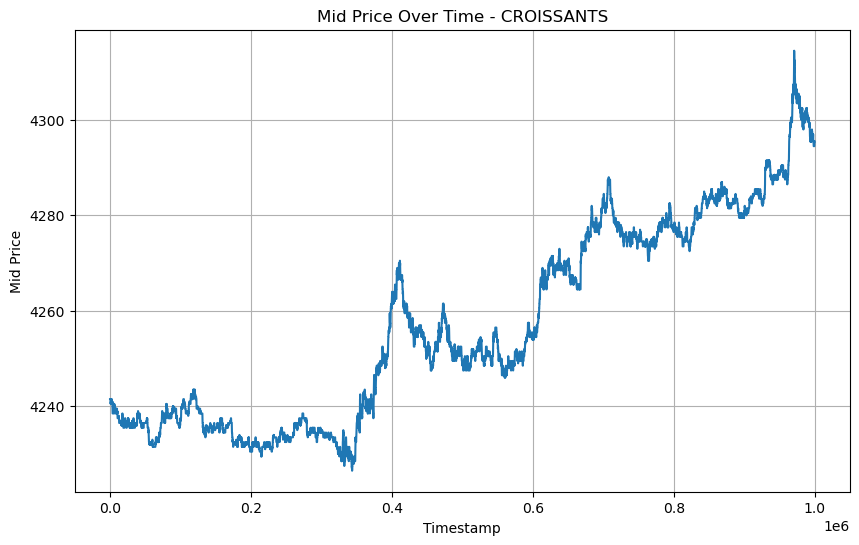

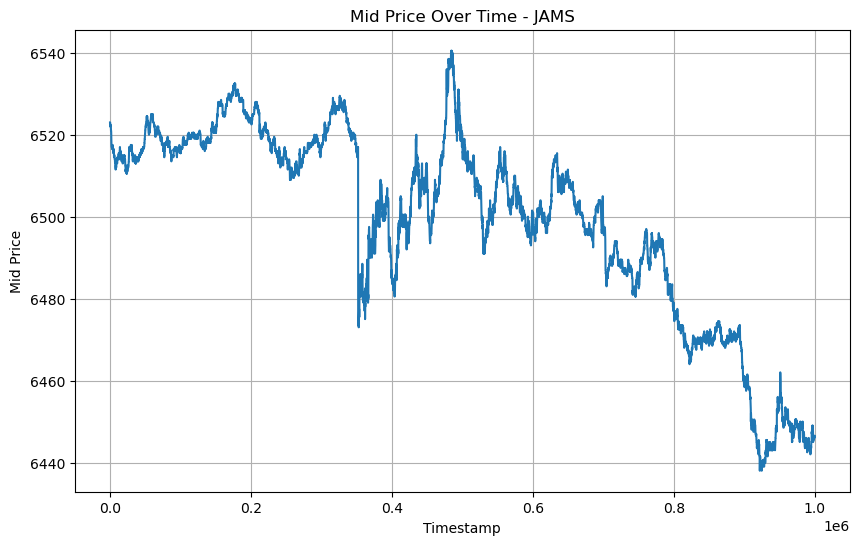

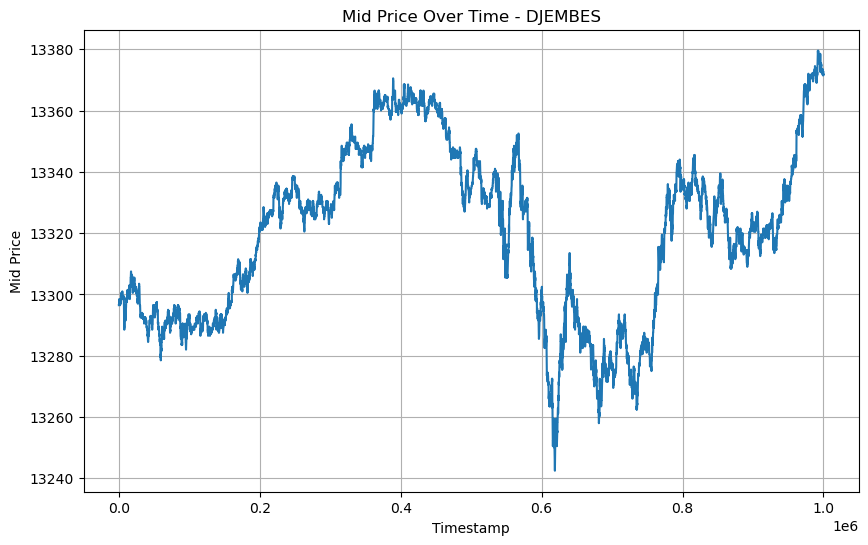

In [11]:
products_round_1 = ['CROISSANTS', 'JAMS', 'DJEMBES']
# Plot each product's mid price on a separate graph
for product in products_round_1:
    plt.figure(figsize=(10, 6))
    mid_price[product].plot()
    plt.title(f"Mid Price Over Time - {product}")
    plt.xlabel("Timestamp")
    plt.ylabel("Mid Price")
    plt.grid(True)
    plt.show()

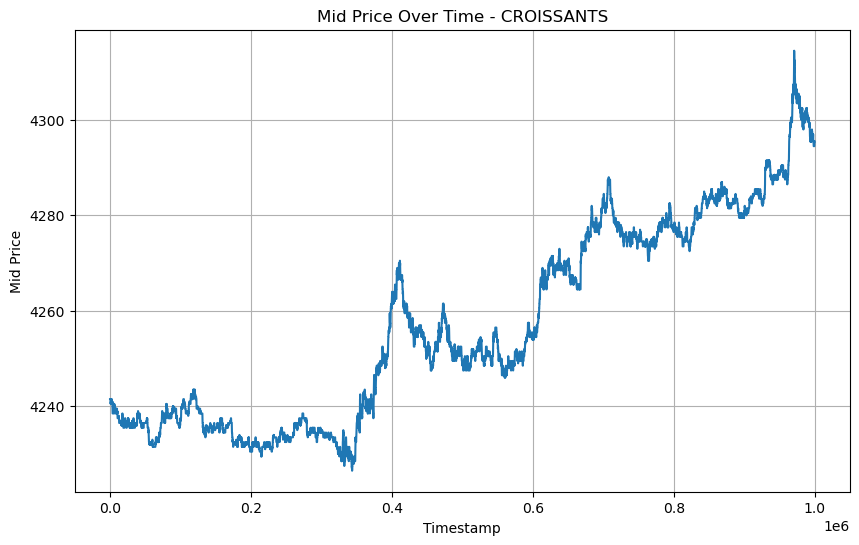

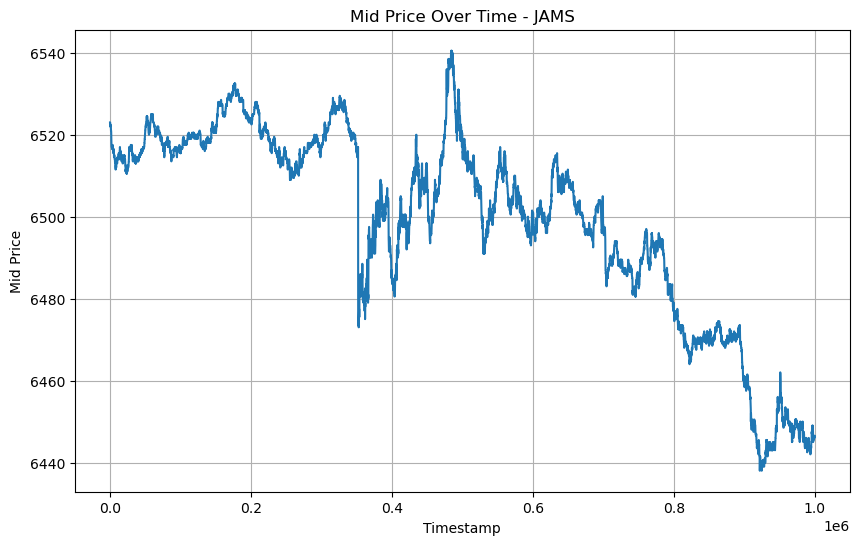

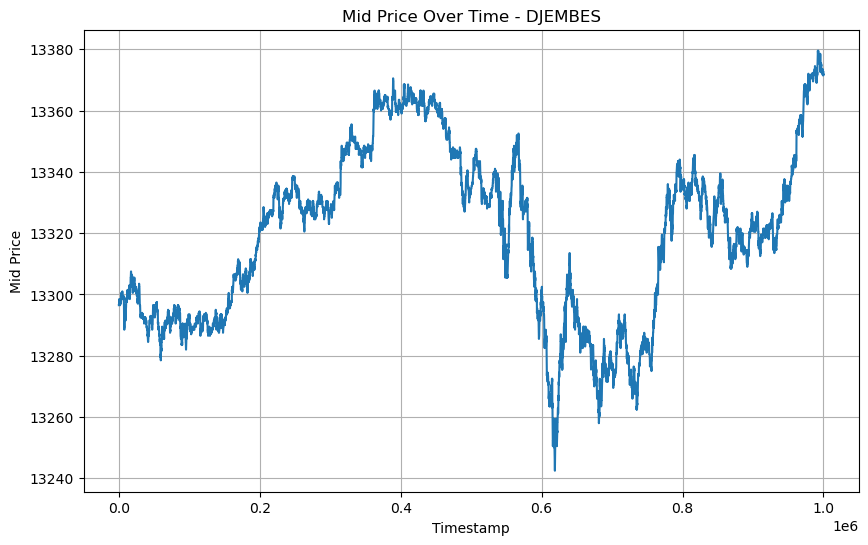

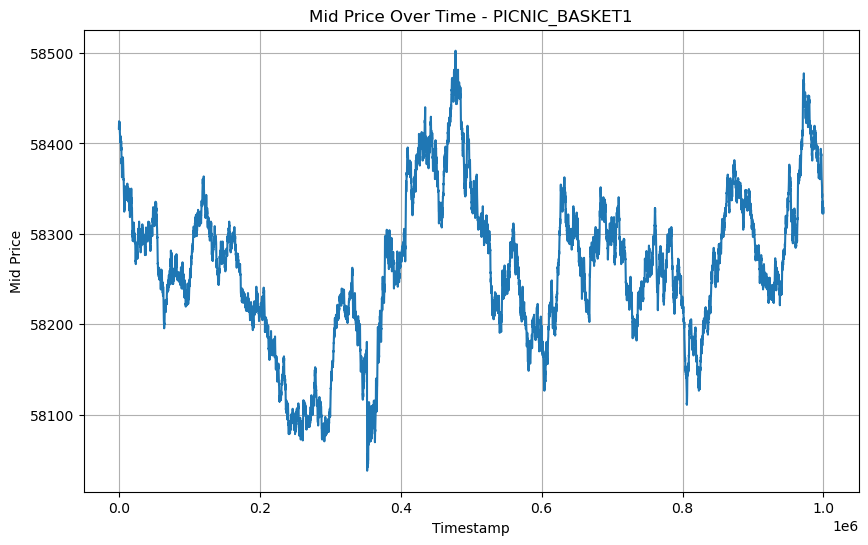

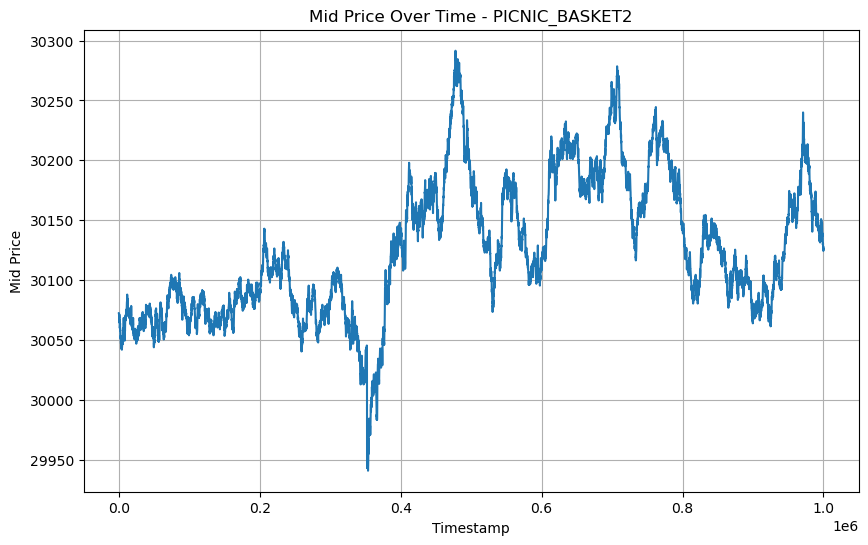

In [12]:
products_round_2 = ['CROISSANTS', 'JAMS', 'DJEMBES', 'PICNIC_BASKET1','PICNIC_BASKET2']
# Plot each product's mid price on a separate graph
for product in products_round_2:
    plt.figure(figsize=(10, 6))
    mid_price[product].plot()
    plt.title(f"Mid Price Over Time - {product}")
    plt.xlabel("Timestamp")
    plt.ylabel("Mid Price")
    plt.grid(True)
    plt.show()

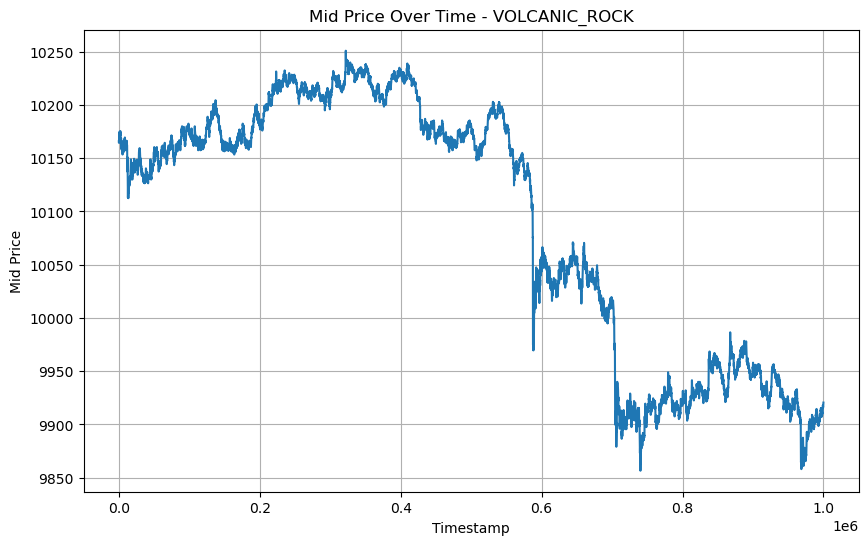

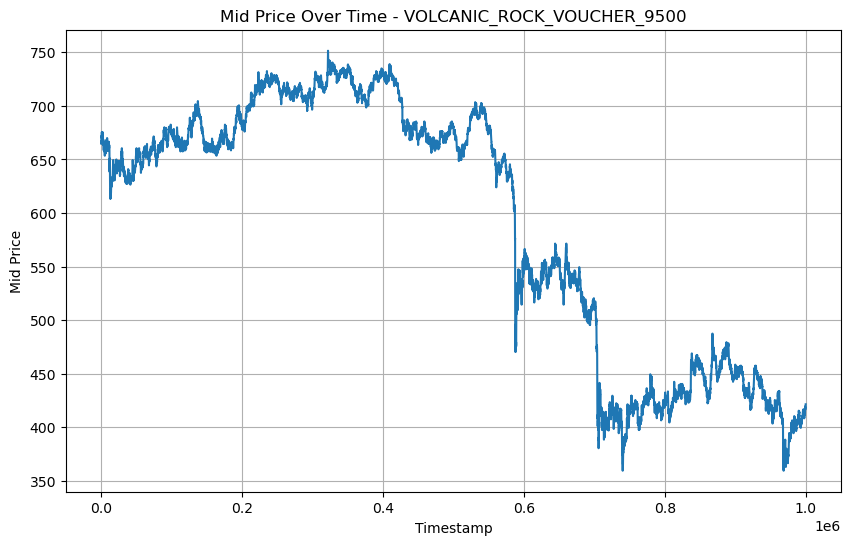

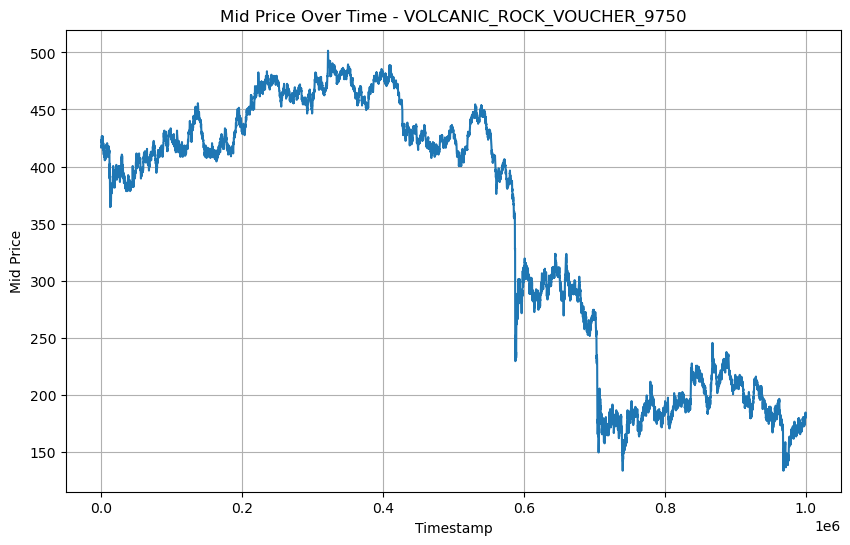

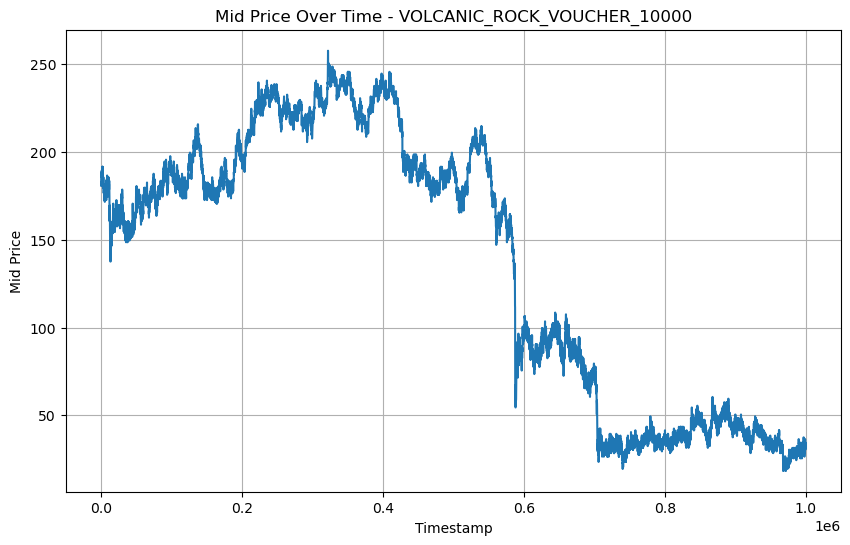

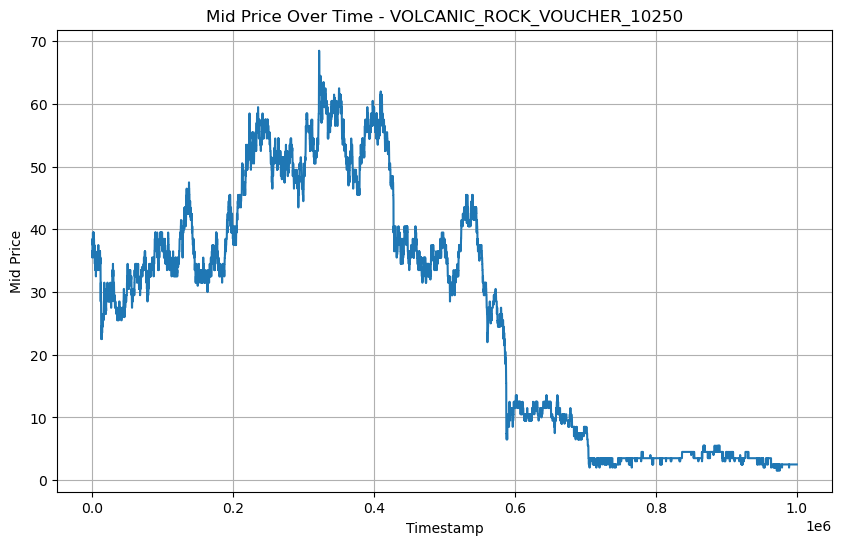

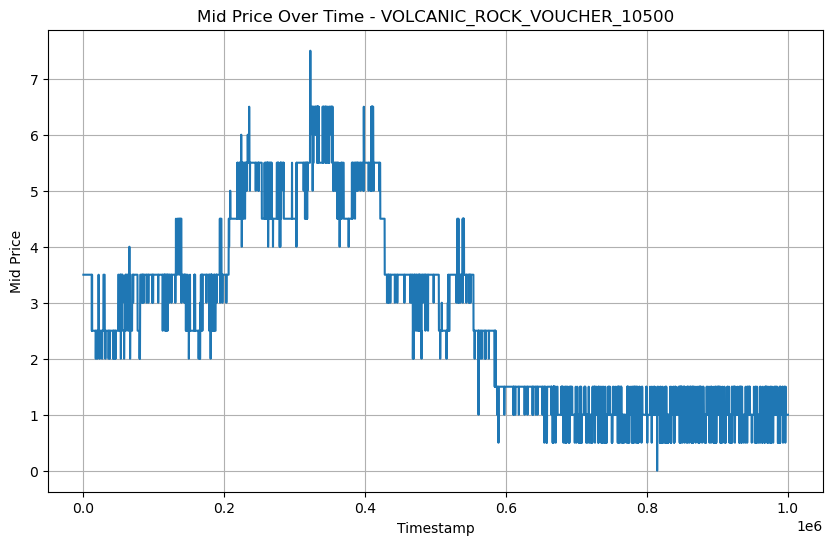

In [13]:
products_round_3 = ['VOLCANIC_ROCK','VOLCANIC_ROCK_VOUCHER_9500','VOLCANIC_ROCK_VOUCHER_9750', 'VOLCANIC_ROCK_VOUCHER_10000', 'VOLCANIC_ROCK_VOUCHER_10250', 'VOLCANIC_ROCK_VOUCHER_10500']
# Plot each product's mid price on a separate graph
for product in products_round_3:
    plt.figure(figsize=(10, 6))
    mid_price[product].plot()
    plt.title(f"Mid Price Over Time - {product}")
    plt.xlabel("Timestamp")
    plt.ylabel("Mid Price")
    plt.grid(True)
    plt.show()

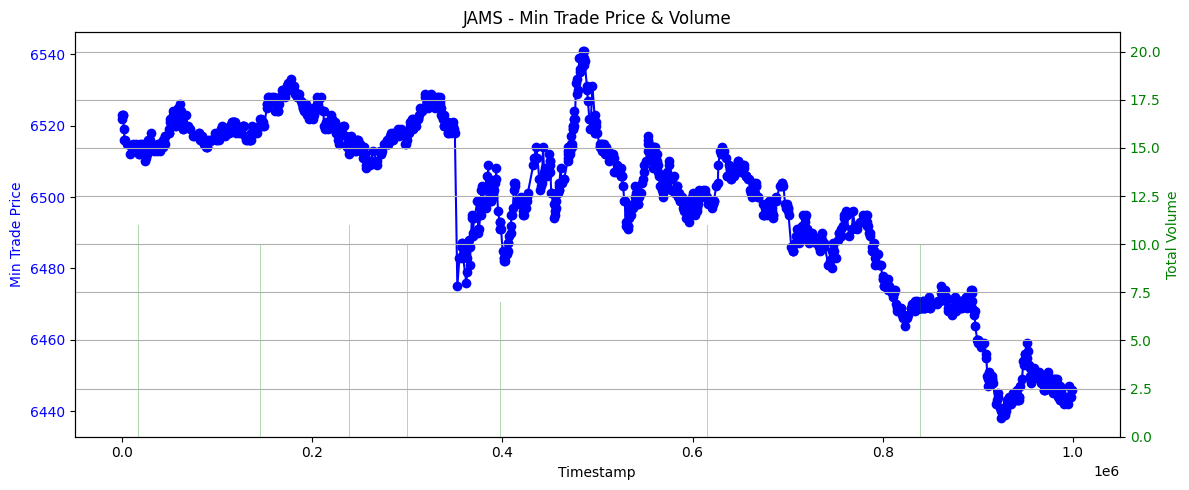

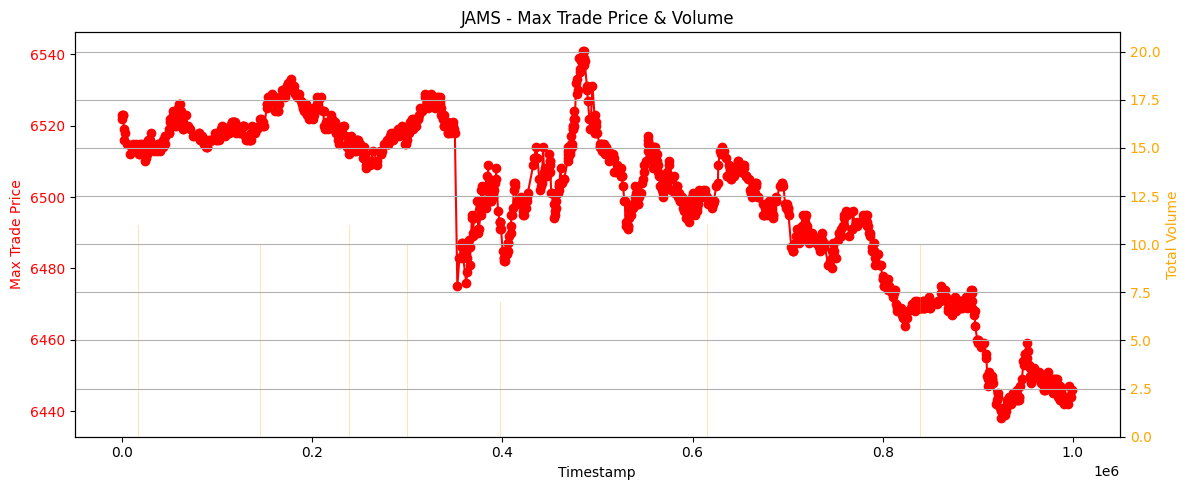

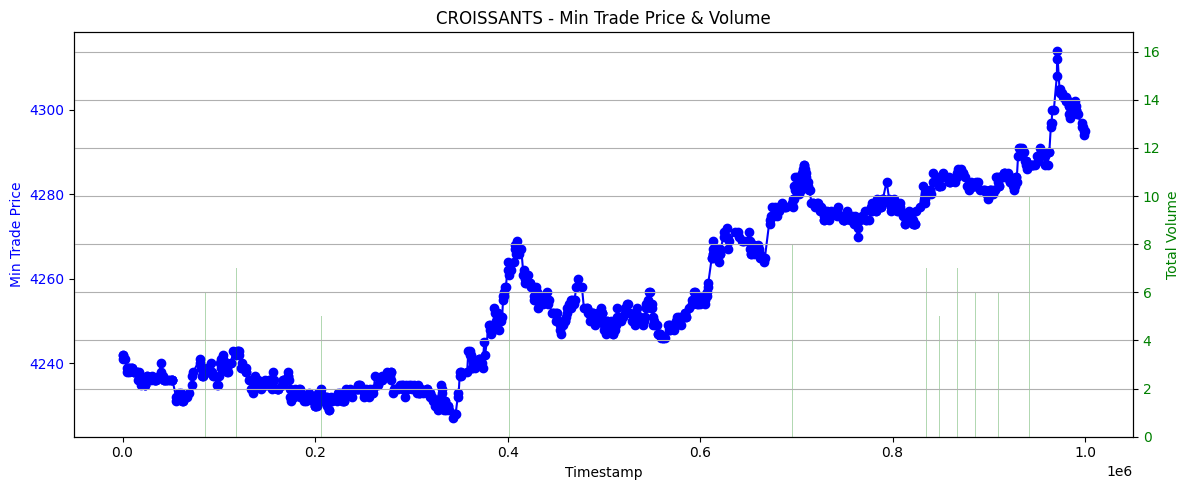

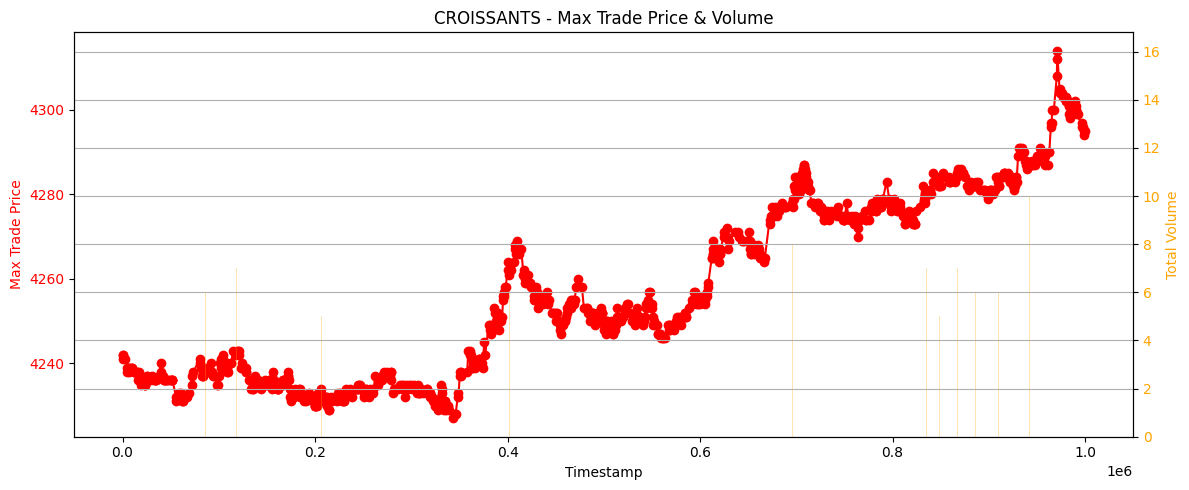

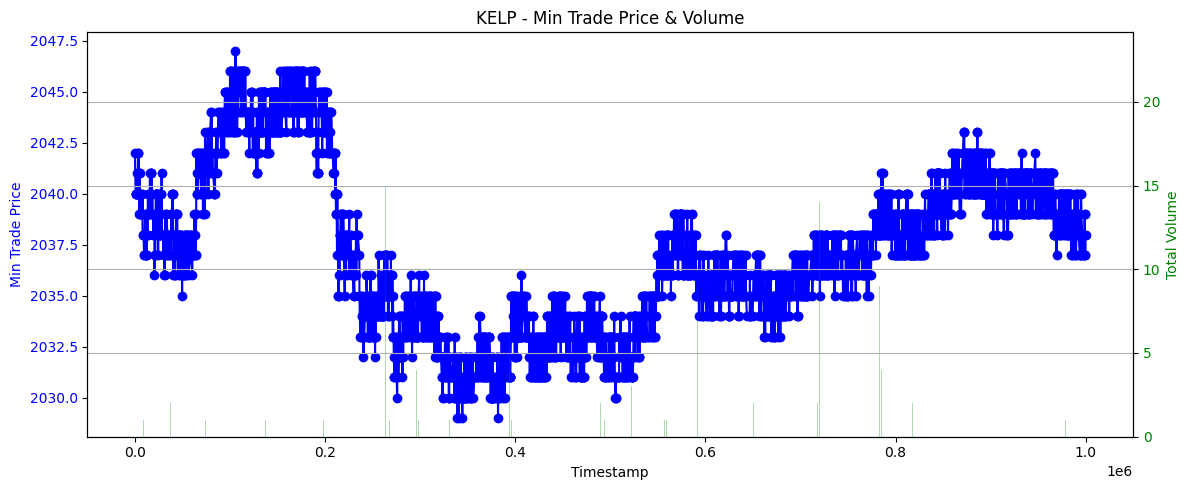

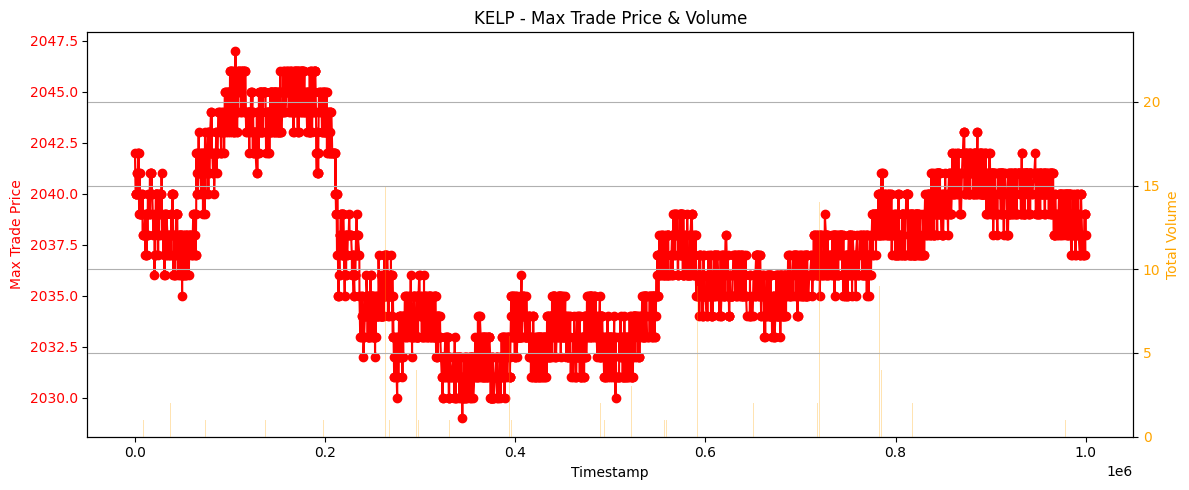

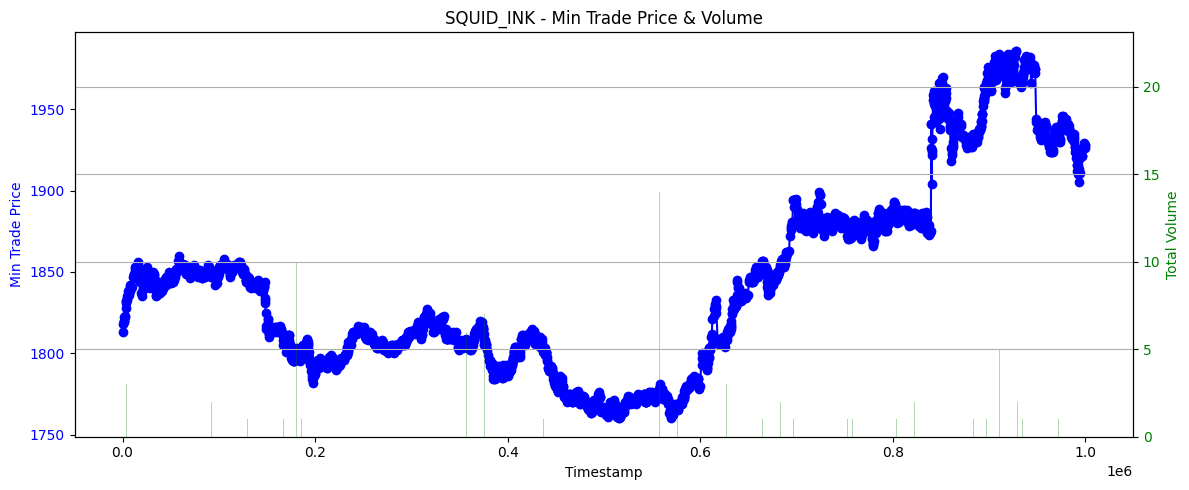

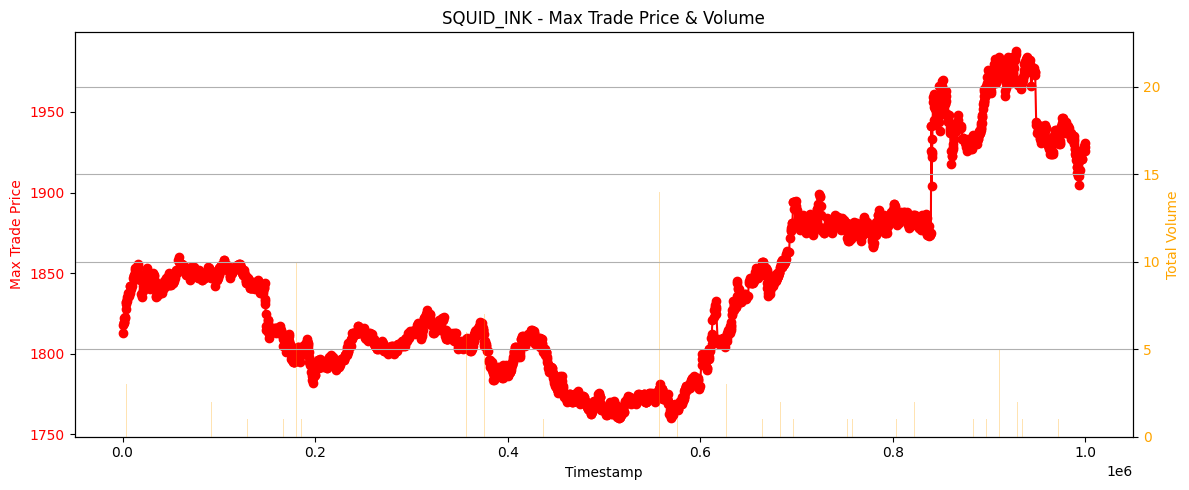

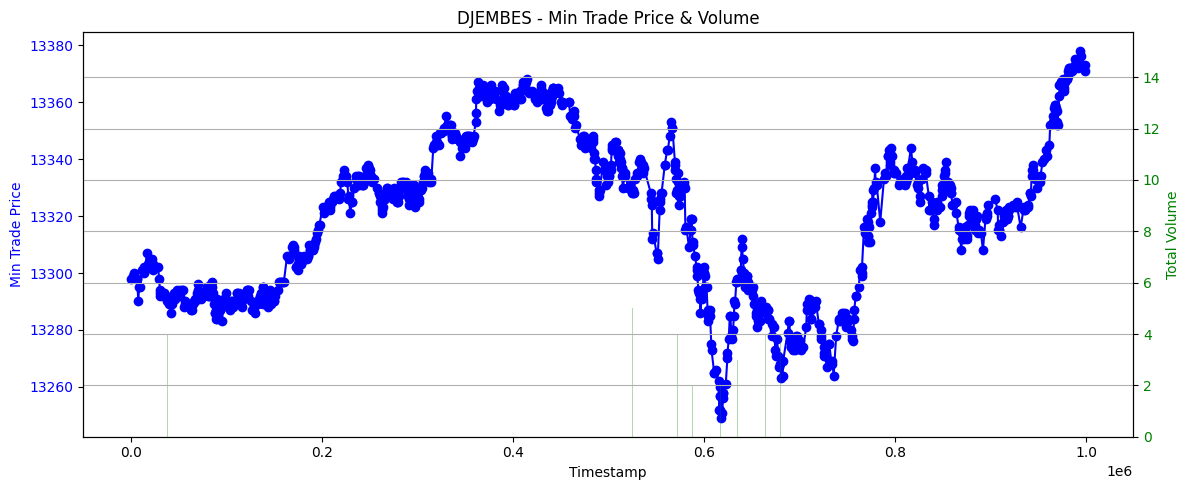

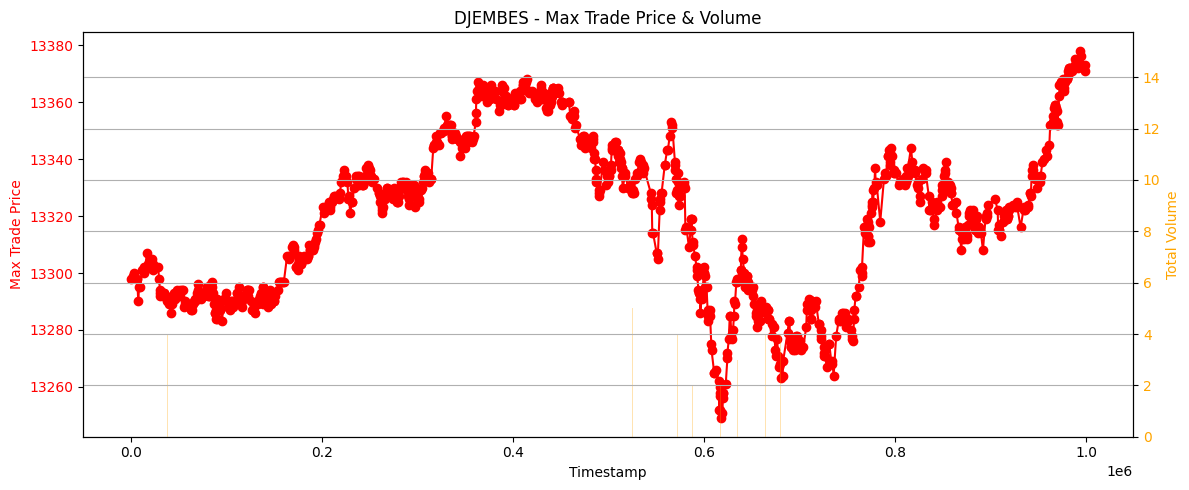

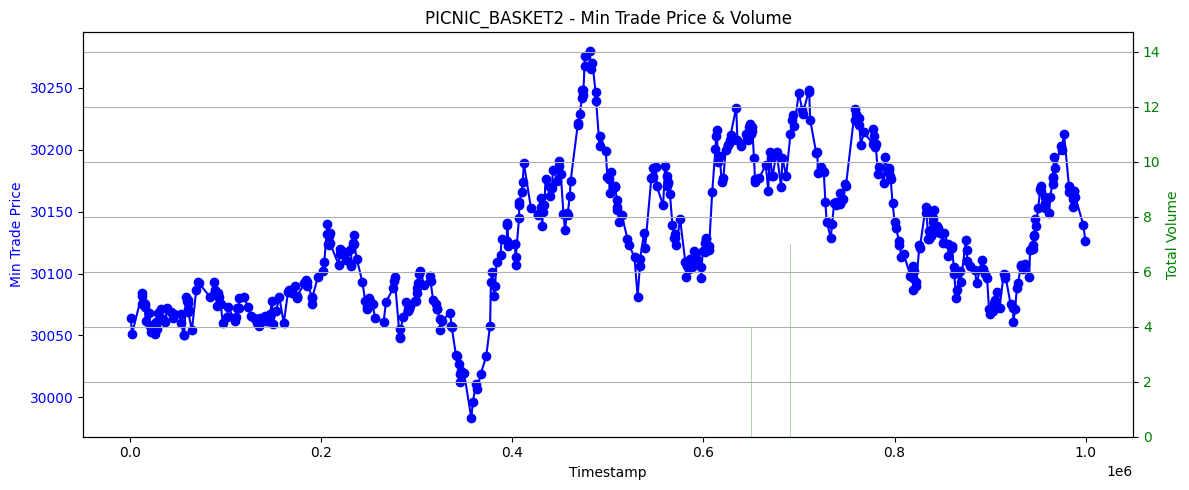

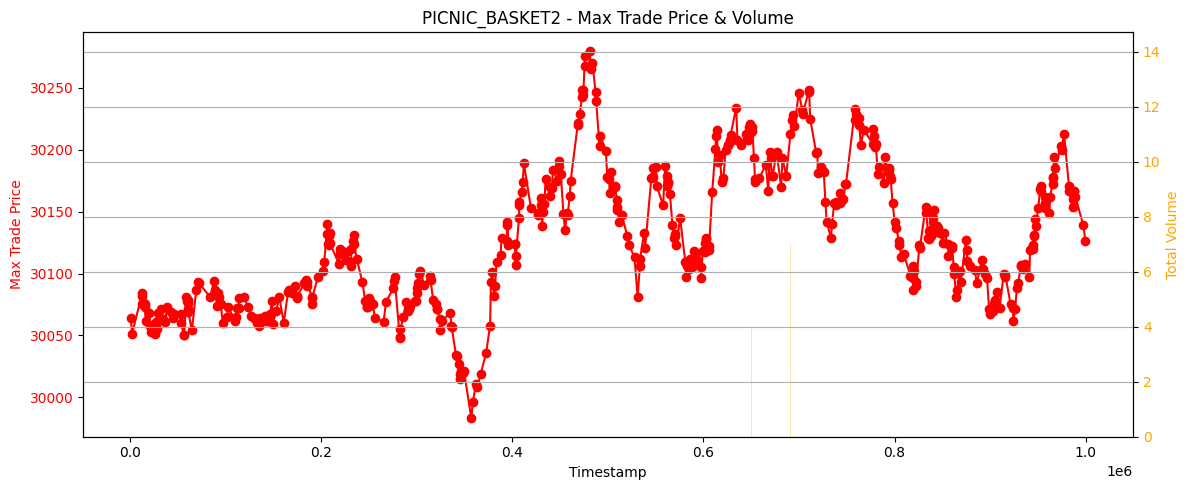

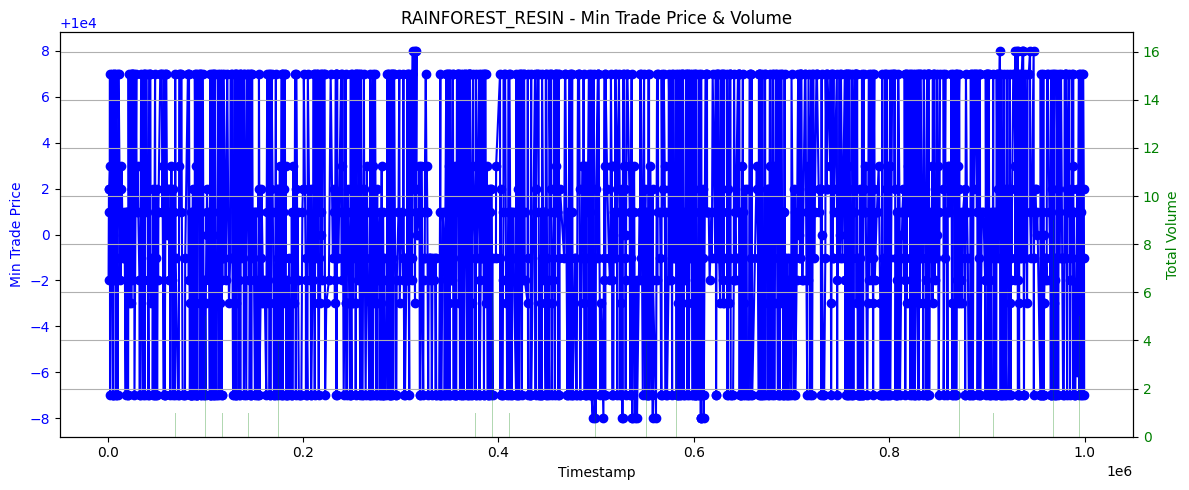

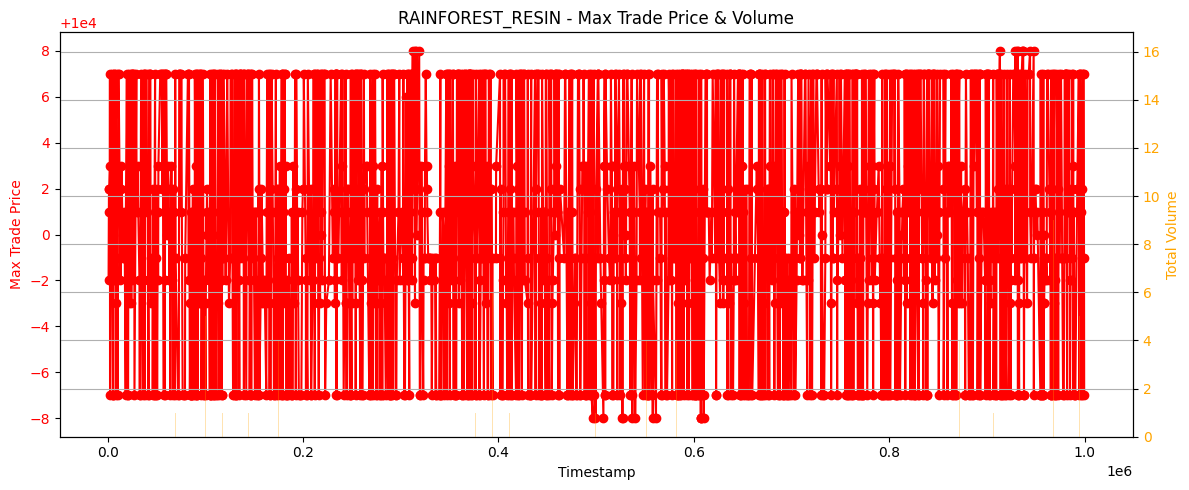

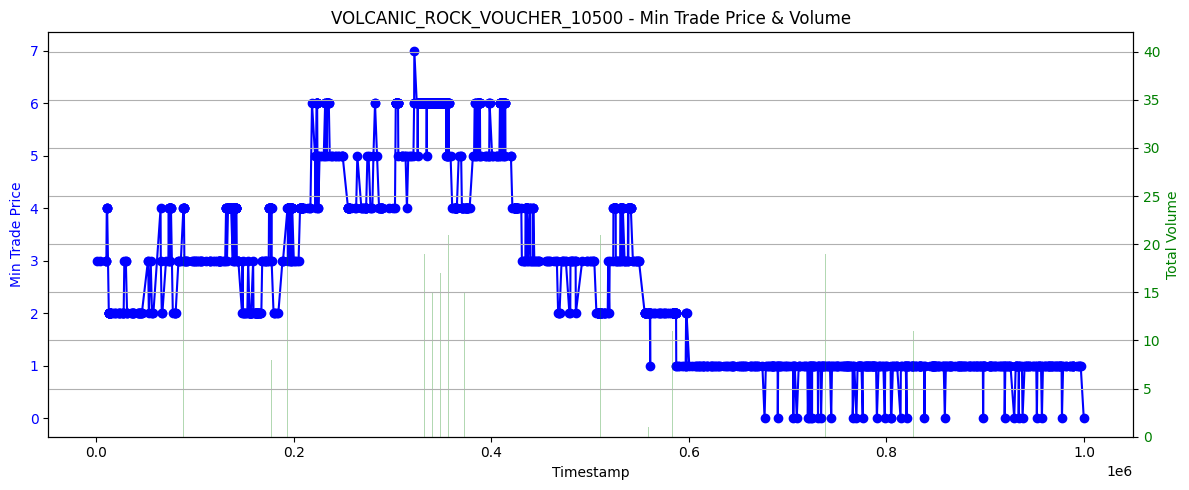

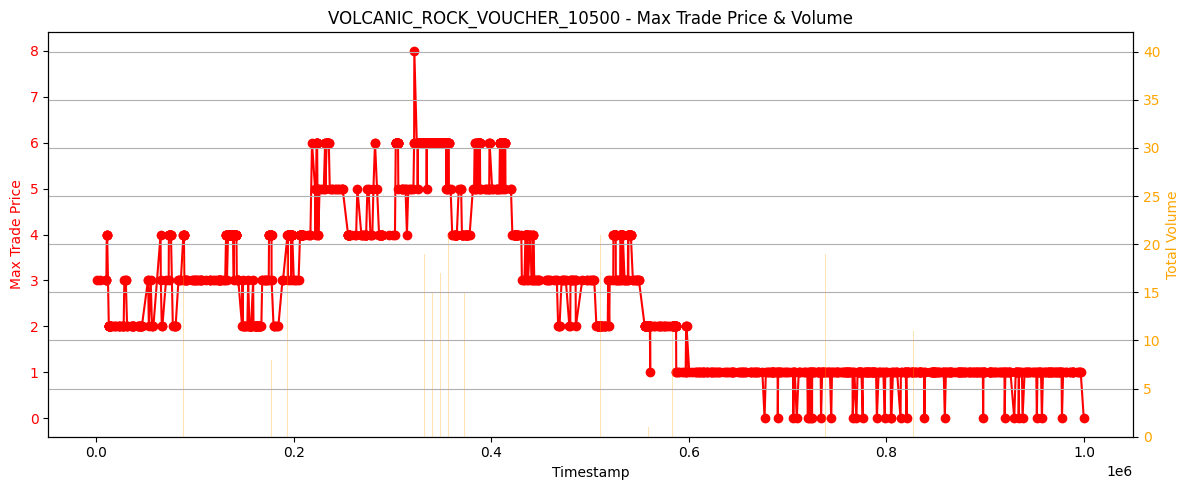

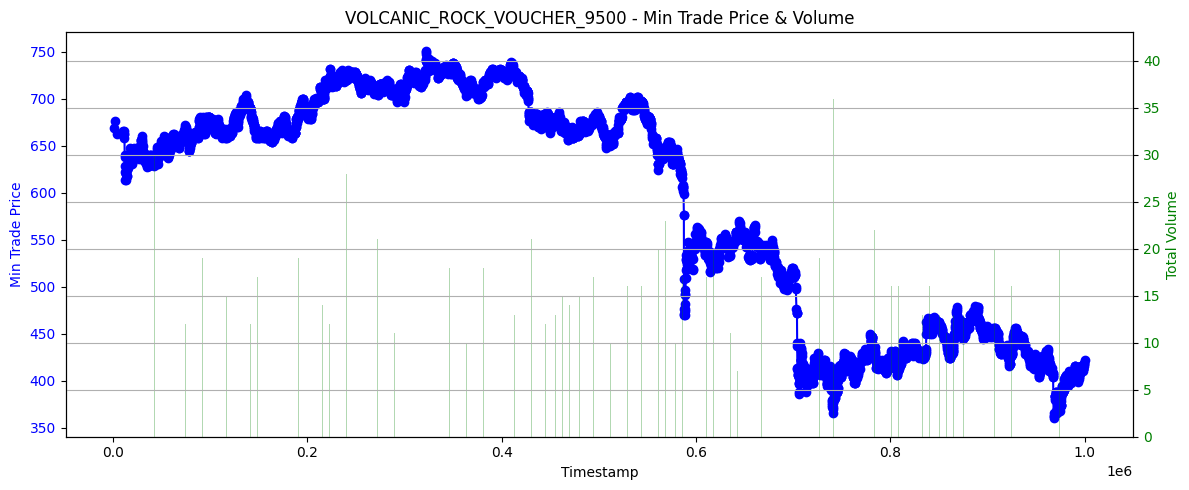

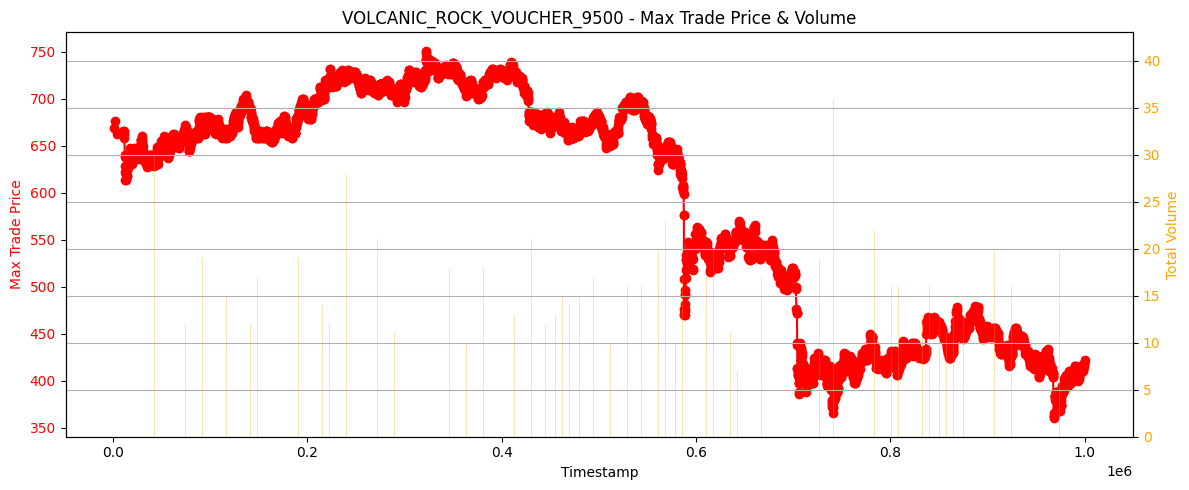

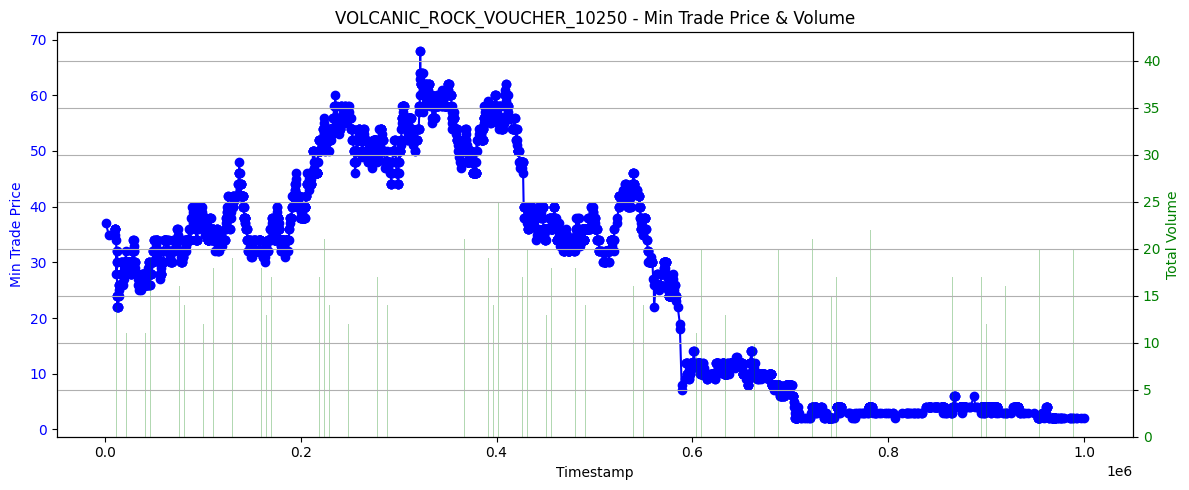

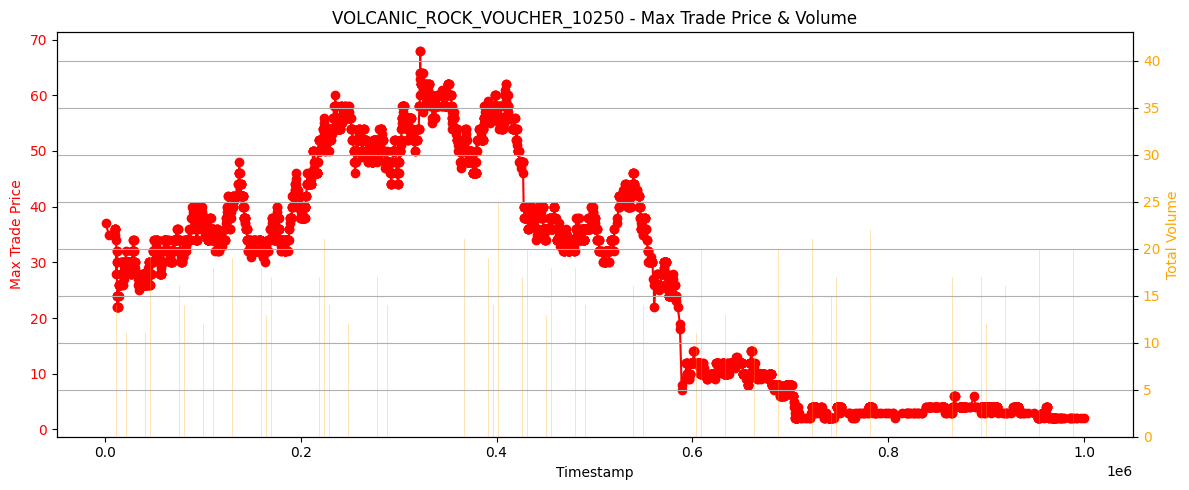

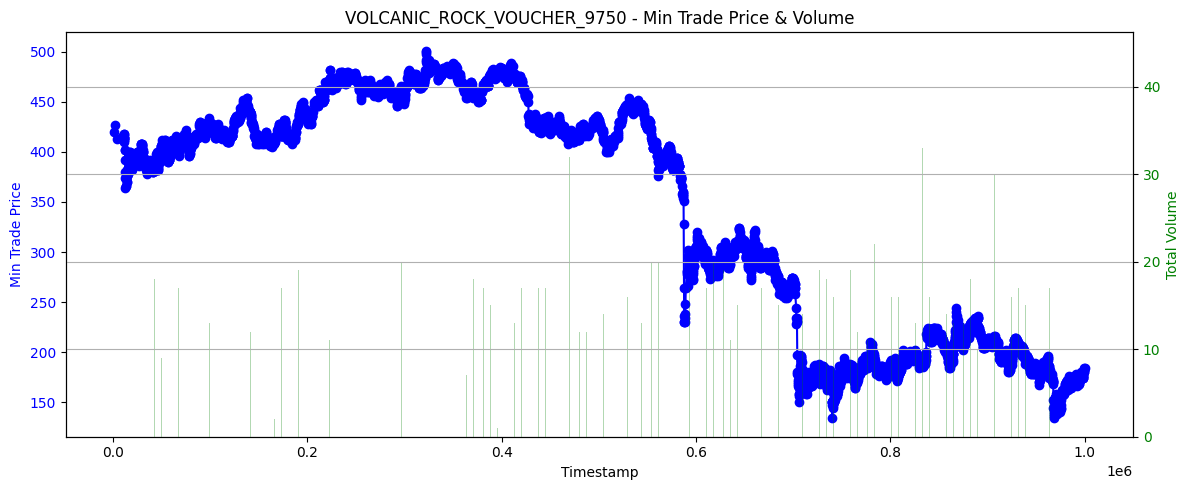

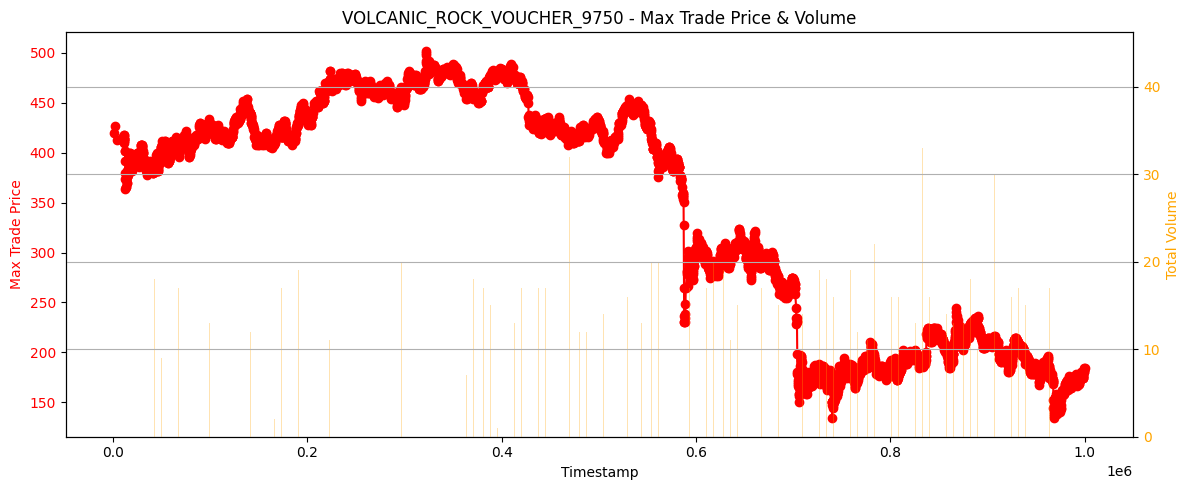

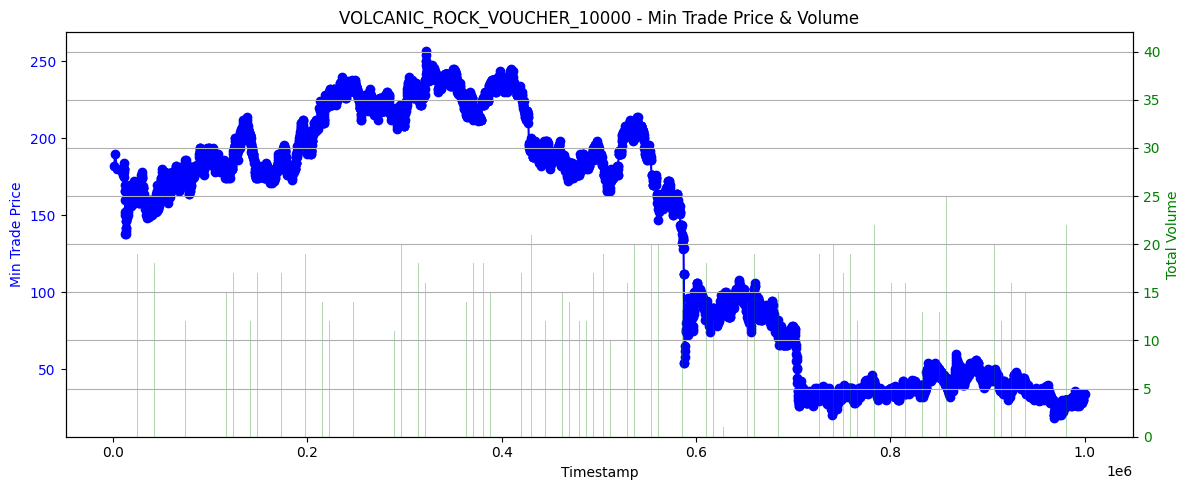

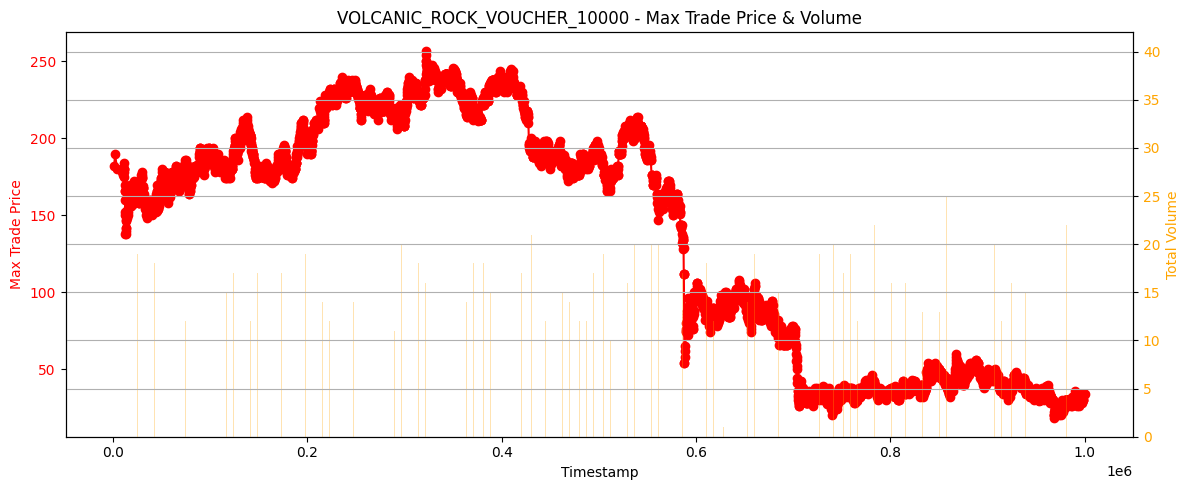

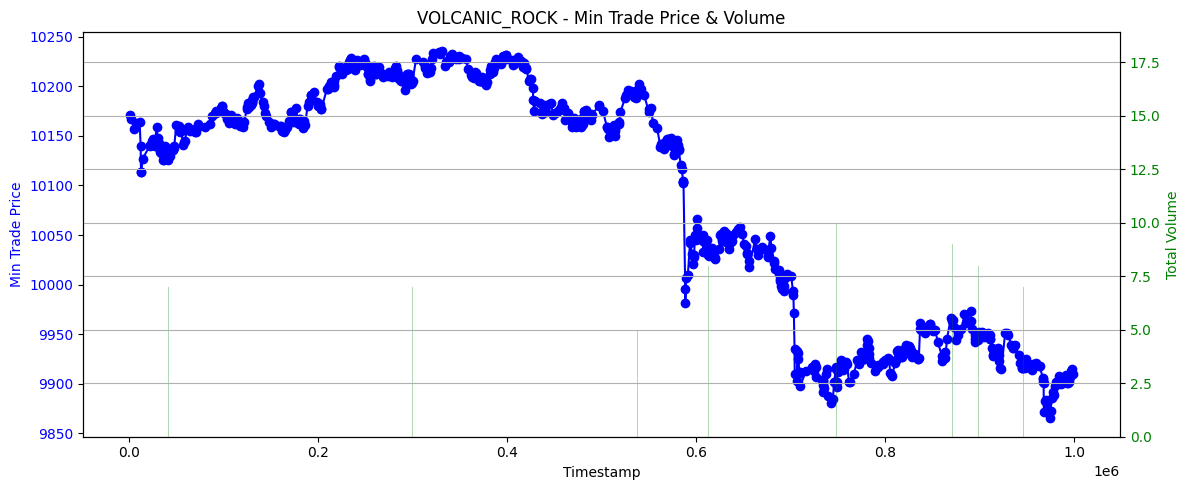

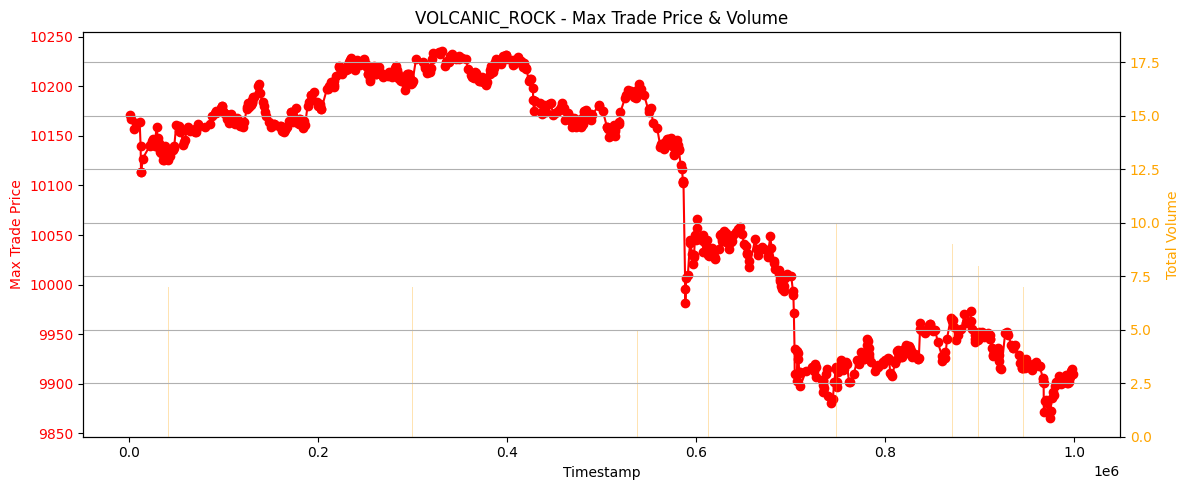

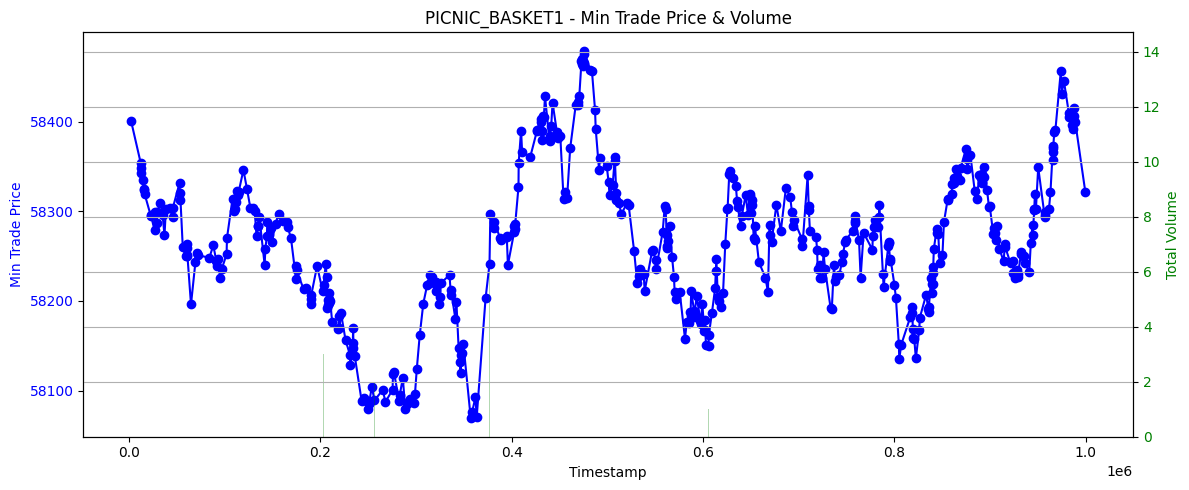

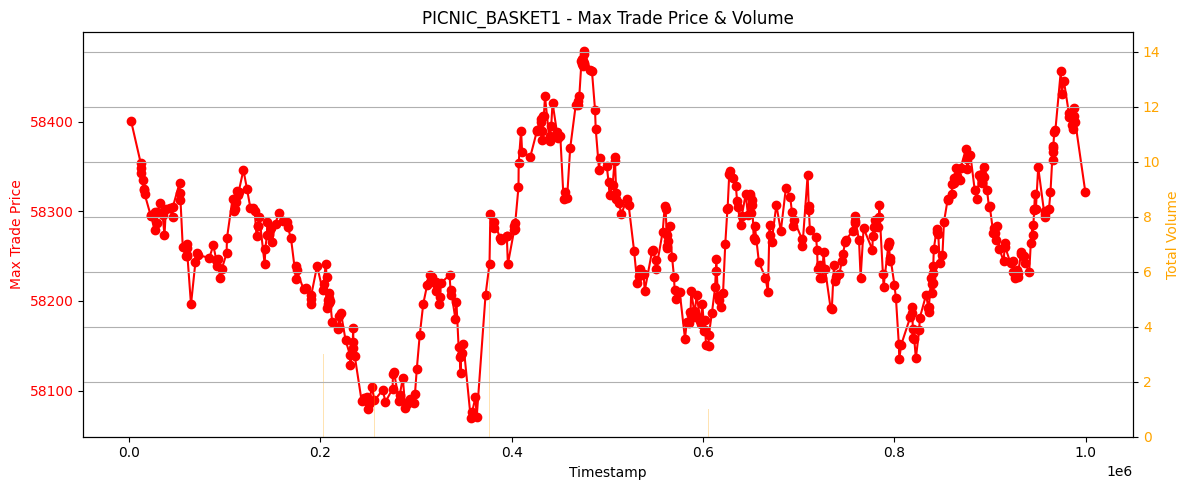

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# --- Extract trade history from the log ---
with open("./89779400-d017-4487-99bd-02d7e72091e1_final.log", "r") as f:
    lines = f.readlines()

in_trade_history = False
trade_lines = []

for line in lines:
    if line.strip() == "Trade History:":
        in_trade_history = True
        continue
    if in_trade_history:
        if line.strip() == "" or line.endswith("log:\n"):
            break
        trade_lines.append(line.strip())

trade_json_str = "\n".join(trade_lines)
if not trade_json_str.startswith("["):
    trade_json_str = "[" + trade_json_str
if not trade_json_str.endswith("]"):
    trade_json_str += "]"

trade_data = json.loads(trade_json_str)
df = pd.DataFrame(trade_data)

# --- Aggregate data by timestamp and symbol to get min/max price and total volume ---
agg_df = df.copy()

# Min price per timestamp for each symbol
min_price_df = (
    agg_df.groupby(["symbol", "timestamp"])
    .agg(min_price=("price", "min"), min_price_volume=("quantity", "sum"))
    .reset_index()
)

# Max price per timestamp for each symbol
max_price_df = (
    agg_df.groupby(["symbol", "timestamp"])
    .agg(max_price=("price", "max"), max_price_volume=("quantity", "sum"))
    .reset_index()
)

# --- Plot per symbol ---
for symbol in agg_df["symbol"].unique():
    min_symbol_df = min_price_df[min_price_df["symbol"] == symbol].sort_values("timestamp")
    max_symbol_df = max_price_df[max_price_df["symbol"] == symbol].sort_values("timestamp")
    
    # Plotting minimum price with volume
    fig, ax1 = plt.subplots(figsize=(12, 5))
    ax1.set_title(f"{symbol} - Min Trade Price & Volume")
    ax1.set_xlabel("Timestamp")

    ax1.set_ylabel("Min Trade Price", color="blue")
    ax1.plot(min_symbol_df["timestamp"], min_symbol_df["min_price"], label="Min Price", color="blue", marker='o')
    ax1.tick_params(axis="y", labelcolor="blue")

    ax2 = ax1.twinx()
    ax2.set_ylabel("Total Volume", color="green")
    ax2.bar(min_symbol_df["timestamp"], min_symbol_df["min_price_volume"], width=10, alpha=0.3, color="green", label="Volume")
    ax2.tick_params(axis="y", labelcolor="green")

    fig.tight_layout()
    plt.grid(True)
    plt.show()

    # Plotting maximum price with volume
    fig, ax1 = plt.subplots(figsize=(12, 5))
    ax1.set_title(f"{symbol} - Max Trade Price & Volume")
    ax1.set_xlabel("Timestamp")

    ax1.set_ylabel("Max Trade Price", color="red")
    ax1.plot(max_symbol_df["timestamp"], max_symbol_df["max_price"], label="Max Price", color="red", marker='o')
    ax1.tick_params(axis="y", labelcolor="red")

    ax2 = ax1.twinx()
    ax2.set_ylabel("Total Volume", color="orange")
    ax2.bar(max_symbol_df["timestamp"], max_symbol_df["max_price_volume"], width=10, alpha=0.3, color="orange", label="Volume")
    ax2.tick_params(axis="y", labelcolor="orange")

    fig.tight_layout()
    plt.grid(True)
    plt.show()